In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/lukewood/rl-routing && cd rl-routing && pip install .

In [32]:
import networkx as nx

graph=nx.random_internet_as_graph(100)
pos = nx.spring_layout(graph)
nx.set_node_attributes(graph, pos, "pos")

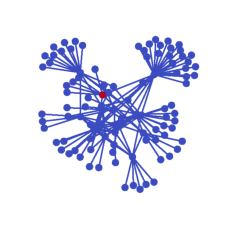

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import time
import rl_routing
from IPython.display import clear_output

def draw_output(img):
    plt.axis("off")
    plt.imshow(img)
    plt.show()

env = rl_routing.NetworkEnv(graph=graph, fig=Figure(figsize=(8, 8)))
env.create_packets(n=1)

for _ in range(100):
    if env.done():
        env.create_packets(n=1)
        continue
        break
    env.step()
    img = env.render()
    draw_output(img)
    time.sleep(100/1000)
    clear_output(wait=True)
draw_output(env.render())
print("Done!")